<a href="https://colab.research.google.com/github/GunnAggarwal/EV_Data_Analysis/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading The Dataset And Importing Libraries

---



In [142]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Matplotlib for inline plots
%matplotlib inline

from google.colab import files
uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Saving EV_DS.csv to EV_DS (6).csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
df=pd.read_csv('EV_DS.csv')

Exploring Dataset

---



In [144]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32711 entries, 0 to 32710
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         32711 non-null  int64  
 1   CP ID       32711 non-null  int64  
 2   Connector   32711 non-null  int64  
 3   Start Date  32711 non-null  object 
 4   Start Time  32711 non-null  object 
 5   End Date    32606 non-null  object 
 6   End Time    32606 non-null  object 
 7   Total kWh   32606 non-null  float64
 8   Site        32711 non-null  object 
 9   Model       32711 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.5+ MB


In [145]:
df_description = df.describe()
print(df_description)

                _id         CP ID     Connector     Total kWh
count  32711.000000  32711.000000  32711.000000  32606.000000
mean   16356.000000  50885.607196      1.754395     10.865159
std     9442.996664    462.711556      0.578024      9.021710
min        1.000000  50245.000000      1.000000     -0.001000
25%     8178.500000  50297.000000      1.000000      4.950000
50%    16356.000000  50839.000000      2.000000      8.580000
75%    24533.500000  51250.000000      2.000000     14.939750
max    32711.000000  51519.000000      3.000000    287.710000


In [146]:
df_head = df.head()
print(df_head)

   _id  CP ID  Connector           Start Date Start Time             End Date  \
0    1  51516          2  2019-08-31T00:00:00      23:26  2019-08-31T00:00:00   
1    2  51249          1  2019-08-31T00:00:00      21:12  2019-08-31T00:00:00   
2    3  50995          2  2019-08-31T00:00:00      20:26  2019-08-31T00:00:00   
3    4  50839          1  2019-08-31T00:00:00      20:06  2019-08-31T00:00:00   
4    5  50745          2  2019-08-31T00:00:00      19:43  2019-08-31T00:00:00   

  End Time  Total kWh                                Site  \
0    23:54     12.780      Kinross Park and Ride, Kinross   
1    21:32      5.700     Atholl Street Car Park, Dunkeld   
2    21:20     27.680  Moness Terrace Car Park, Aberfeldy   
3    23:03     17.526                  Mill Street, Perth   
4    20:23     12.930      Kinross Park and Ride, Kinross   

                          Model  
0      APT Triple Rapid Charger  
1  Siemens Triple Rapid Charger  
2      APT Triple Rapid Charger  
3         

In [196]:
df["Start Date"] = pd.to_datetime(df["Start Date"], errors="coerce")
df["Year-Month"] = df["Start Date"].dt.to_period("M")

Graph Of Total Energy Consumption Over Time

---



<ipython-input-148-9b706f0e1614>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["Year-Month"].astype(str), y=df["Total kWh"], estimator="sum", ci=None)


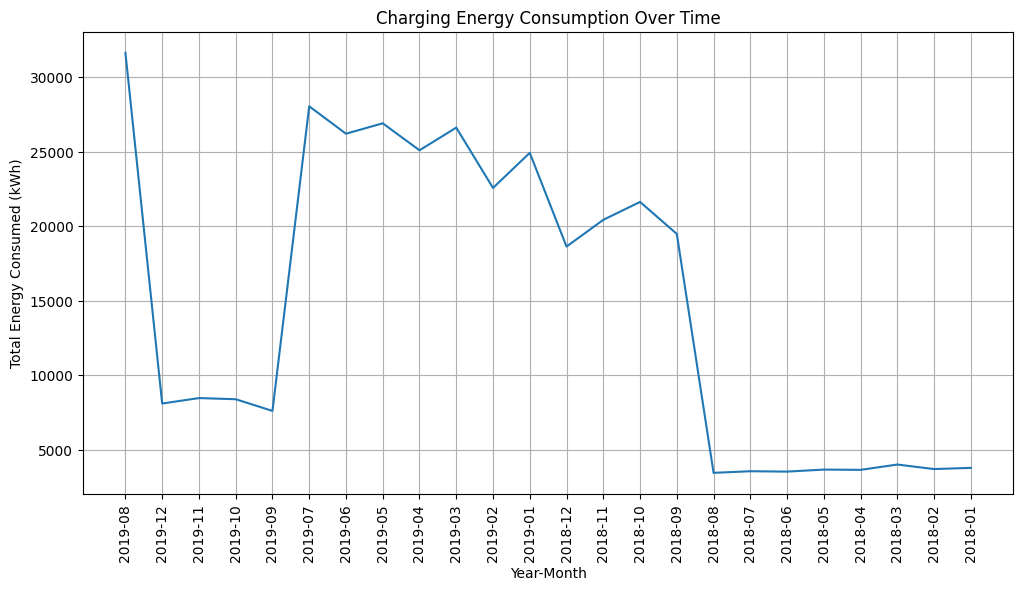

In [148]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year-Month"].astype(str), y=df["Total kWh"], estimator="sum", ci=None)
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Total Energy Consumed (kWh)")
plt.title("Charging Energy Consumption Over Time")
plt.grid(True)
plt.show()

Chaecking For Missing Values

---



In [149]:
df.isnull().sum()

,0
_id,0
CP ID,0
Connector,0
Start Date,0
Start Time,0
End Date,105
End Time,105
Total kWh,105
Site,0
Model,0


Handling Missing Values

---



In [150]:
df["End Date"].ffill(inplace=True)
df["End Time"].ffill(inplace=True)

<ipython-input-150-7c7086b070a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["End Date"].ffill(inplace=True)
<ipython-input-150-7c7086b070a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [151]:
n=df['Total kWh'].mean()
df['Total kWh'].fillna(n,inplace=True)

<ipython-input-151-5a0002702ca1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total kWh'].fillna(n,inplace=True)


In [152]:
df.isnull().sum()

,0
_id,0
CP ID,0
Connector,0
Start Date,0
Start Time,0
End Date,0
End Time,0
Total kWh,0
Site,0
Model,0


Adding Feature

---



*   Charging Duration


In [153]:
df['End Time'] = pd.to_datetime(df['End Time'])
df['Start Time'] = pd.to_datetime(df['Start Time'])

<ipython-input-153-34e3306f66fb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['End Time'] = pd.to_datetime(df['End Time'])
<ipython-input-153-34e3306f66fb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Time'] = pd.to_datetime(df['Start Time'])


In [154]:
print(df)

         _id  CP ID  Connector Start Date          Start Time  \
0          1  51516          2 2019-08-31 2025-03-15 23:26:00   
1          2  51249          1 2019-08-31 2025-03-15 21:12:00   
2          3  50995          2 2019-08-31 2025-03-15 20:26:00   
3          4  50839          1 2019-08-31 2025-03-15 20:06:00   
4          5  50745          2 2019-08-31 2025-03-15 19:43:00   
...      ...    ...        ...        ...                 ...   
32706  32707  50286          2 2018-01-09 2025-03-15 08:38:00   
32707  32708  50276          2 2018-01-09 2025-03-15 08:35:00   
32708  32709  50994          2 2018-01-09 2025-03-15 08:17:00   
32709  32710  50286          2 2018-01-09 2025-03-15 06:13:00   
32710  32711  50286          2 2018-01-09 2025-03-15 02:31:00   

                  End Date            End Time  Total kWh  \
0      2019-08-31T00:00:00 2025-03-15 23:54:00     12.780   
1      2019-08-31T00:00:00 2025-03-15 21:32:00      5.700   
2      2019-08-31T00:00:00 2025-03-1

In [155]:
df["Duration"] = df["End Time"] - df["Start Time"]

In [156]:
df['Duration'] = np.where(df['Duration'] < pd.Timedelta(0), df['Start Time'] - df['End Time'], df['End Time'] - df['Start Time'])

In [157]:
print(df['Duration'])

0       0 days 00:28:00
1       0 days 00:20:00
2       0 days 00:54:00
3       0 days 02:57:00
4       0 days 00:40:00
              ...      
32706   0 days 00:28:00
32707   0 days 09:36:00
32708   0 days 00:29:00
32709   0 days 00:12:00
32710   0 days 00:32:00
Name: Duration, Length: 32711, dtype: timedelta64[ns]


In [158]:
time = df['Duration']
time = time.dt.total_seconds()
print(time)

0         1680.0
1         1200.0
2         3240.0
3        10620.0
4         2400.0
          ...   
32706     1680.0
32707    34560.0
32708     1740.0
32709      720.0
32710     1920.0
Name: Duration, Length: 32711, dtype: float64


In [159]:
df['Duration']=time

In [160]:
print(df)

         _id  CP ID  Connector Start Date          Start Time  \
0          1  51516          2 2019-08-31 2025-03-15 23:26:00   
1          2  51249          1 2019-08-31 2025-03-15 21:12:00   
2          3  50995          2 2019-08-31 2025-03-15 20:26:00   
3          4  50839          1 2019-08-31 2025-03-15 20:06:00   
4          5  50745          2 2019-08-31 2025-03-15 19:43:00   
...      ...    ...        ...        ...                 ...   
32706  32707  50286          2 2018-01-09 2025-03-15 08:38:00   
32707  32708  50276          2 2018-01-09 2025-03-15 08:35:00   
32708  32709  50994          2 2018-01-09 2025-03-15 08:17:00   
32709  32710  50286          2 2018-01-09 2025-03-15 06:13:00   
32710  32711  50286          2 2018-01-09 2025-03-15 02:31:00   

                  End Date            End Time  Total kWh  \
0      2019-08-31T00:00:00 2025-03-15 23:54:00     12.780   
1      2019-08-31T00:00:00 2025-03-15 21:32:00      5.700   
2      2019-08-31T00:00:00 2025-03-1

In [161]:
total_kwh = df['Total kWh']
connector = df['Connector']

Graph Of Number Of Charges Per Site

---



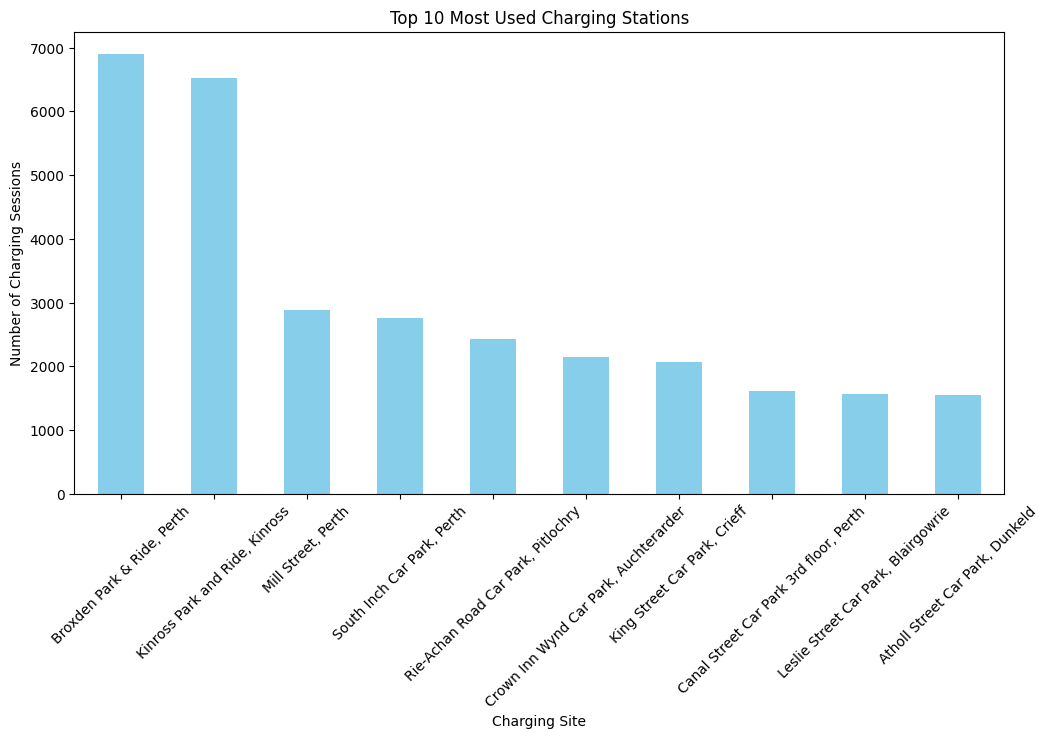

In [162]:
plt.figure(figsize=(12, 6))
df["Site"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.xlabel("Charging Site")
plt.ylabel("Number of Charging Sessions")
plt.title("Top 10 Most Used Charging Stations")
plt.xticks(rotation=45)
plt.show()



*   Connector Efficiency



In [163]:
df['connector_efficiency'] = total_kwh / connector

In [164]:
print(df)

         _id  CP ID  Connector Start Date          Start Time  \
0          1  51516          2 2019-08-31 2025-03-15 23:26:00   
1          2  51249          1 2019-08-31 2025-03-15 21:12:00   
2          3  50995          2 2019-08-31 2025-03-15 20:26:00   
3          4  50839          1 2019-08-31 2025-03-15 20:06:00   
4          5  50745          2 2019-08-31 2025-03-15 19:43:00   
...      ...    ...        ...        ...                 ...   
32706  32707  50286          2 2018-01-09 2025-03-15 08:38:00   
32707  32708  50276          2 2018-01-09 2025-03-15 08:35:00   
32708  32709  50994          2 2018-01-09 2025-03-15 08:17:00   
32709  32710  50286          2 2018-01-09 2025-03-15 06:13:00   
32710  32711  50286          2 2018-01-09 2025-03-15 02:31:00   

                  End Date            End Time  Total kWh  \
0      2019-08-31T00:00:00 2025-03-15 23:54:00     12.780   
1      2019-08-31T00:00:00 2025-03-15 21:32:00      5.700   
2      2019-08-31T00:00:00 2025-03-1

**Total energy consumption vs Frequency**

---


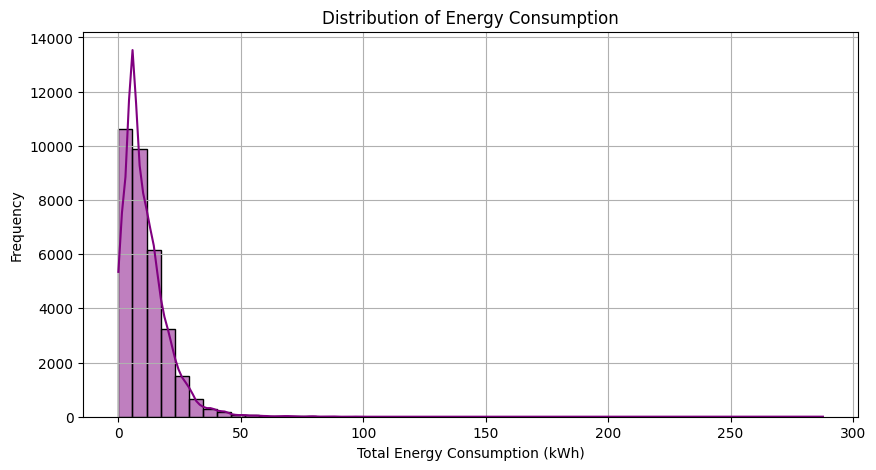

In [165]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Total kWh"], bins=50, kde=True, color="purple")
plt.xlabel("Total Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.grid(True)
plt.show()

Dropping Columns

---



In [166]:
date_columns = ['Start Date', 'End Date', 'Start Time', 'End Time','_id','CP ID','Year-Month']
dataset= df.drop(date_columns , axis=1)
print(dataset)

       Connector  Total kWh                                 Site  \
0              2     12.780       Kinross Park and Ride, Kinross   
1              1      5.700      Atholl Street Car Park, Dunkeld   
2              2     27.680   Moness Terrace Car Park, Aberfeldy   
3              1     17.526                   Mill Street, Perth   
4              2     12.930       Kinross Park and Ride, Kinross   
...          ...        ...                                  ...   
32706          2     20.220           Broxden Park & Ride, Perth   
32707          2     11.580           South Inch Car Park, Perth   
32708          2     10.840  Leslie Street Car Park, Blairgowrie   
32709          2      8.780           Broxden Park & Ride, Perth   
32710          2     16.430           Broxden Park & Ride, Perth   

                              Model  Duration  connector_efficiency  
0          APT Triple Rapid Charger    1680.0                 6.390  
1      Siemens Triple Rapid Charger    1200

In [167]:
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [168]:
print(x)

[[2 12.78 'Kinross Park and Ride, Kinross' 'APT Triple Rapid Charger'
  1680.0]
 [1 5.7 'Atholl Street Car Park, Dunkeld' 'Siemens Triple Rapid Charger'
  1200.0]
 [2 27.68 'Moness Terrace Car Park, Aberfeldy' 'APT Triple Rapid Charger'
  3240.0]
 ...
 [2 10.84 'Leslie Street Car Park, Blairgowrie'
  'APT Triple Rapid Charger' 1740.0]
 [2 8.78 'Broxden Park & Ride, Perth' 'APT Triple Rapid Charger' 720.0]
 [2 16.43 'Broxden Park & Ride, Perth' 'APT Triple Rapid Charger' 1920.0]]


In [169]:
print(y)

[ 6.39  5.7  13.84 ...  5.42  4.39  8.21]


Encoding Categorical Variables

---



In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[2,3])],remainder='passthrough')
x=ct.fit_transform(x)

In [171]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 162224 stored elements and shape (32711, 24)>
  Coords	Values
  (0, 7)	1.0
  (0, 17)	1.0
  (0, 21)	2.0
  (0, 22)	12.78
  (0, 23)	1680.0
  (1, 1)	1.0
  (1, 20)	1.0
  (1, 21)	1.0
  (1, 22)	5.7
  (1, 23)	1200.0
  (2, 11)	1.0
  (2, 17)	1.0
  (2, 21)	2.0
  (2, 22)	27.68
  (2, 23)	3240.0
  (3, 10)	1.0
  (3, 15)	1.0
  (3, 21)	1.0
  (3, 22)	17.526
  (3, 23)	10620.0
  (4, 7)	1.0
  (4, 17)	1.0
  (4, 21)	2.0
  (4, 22)	12.93
  (4, 23)	2400.0
  :	:
  (32706, 2)	1.0
  (32706, 17)	1.0
  (32706, 21)	2.0
  (32706, 22)	20.22
  (32706, 23)	1680.0
  (32707, 13)	1.0
  (32707, 14)	1.0
  (32707, 21)	2.0
  (32707, 22)	11.58
  (32707, 23)	34560.0
  (32708, 8)	1.0
  (32708, 17)	1.0
  (32708, 21)	2.0
  (32708, 22)	10.84
  (32708, 23)	1740.0
  (32709, 2)	1.0
  (32709, 17)	1.0
  (32709, 21)	2.0
  (32709, 22)	8.78
  (32709, 23)	720.0
  (32710, 2)	1.0
  (32710, 17)	1.0
  (32710, 21)	2.0
  (32710, 22)	16.43
  (32710, 23)	1920.0


Min-Max Scaling

---



In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Total kWh','connector_efficiency','Duration']] = scaler.fit_transform(df[["Total kWh","connector_efficiency","Duration"]])

In [173]:
print(df)

         _id  CP ID  Connector Start Date          Start Time  \
0          1  51516          2 2019-08-31 2025-03-15 23:26:00   
1          2  51249          1 2019-08-31 2025-03-15 21:12:00   
2          3  50995          2 2019-08-31 2025-03-15 20:26:00   
3          4  50839          1 2019-08-31 2025-03-15 20:06:00   
4          5  50745          2 2019-08-31 2025-03-15 19:43:00   
...      ...    ...        ...        ...                 ...   
32706  32707  50286          2 2018-01-09 2025-03-15 08:38:00   
32707  32708  50276          2 2018-01-09 2025-03-15 08:35:00   
32708  32709  50994          2 2018-01-09 2025-03-15 08:17:00   
32709  32710  50286          2 2018-01-09 2025-03-15 06:13:00   
32710  32711  50286          2 2018-01-09 2025-03-15 02:31:00   

                  End Date            End Time  Total kWh  \
0      2019-08-31T00:00:00 2025-03-15 23:54:00   0.044423   
1      2019-08-31T00:00:00 2025-03-15 21:32:00   0.019815   
2      2019-08-31T00:00:00 2025-03-1

Train-Test Split

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [175]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 129803 stored elements and shape (26168, 24)>
  Coords	Values
  (0, 2)	1.0
  (0, 17)	1.0
  (0, 21)	2.0
  (0, 22)	26.98
  (0, 23)	3600.0
  (1, 2)	1.0
  (1, 17)	1.0
  (1, 21)	1.0
  (1, 22)	6.554
  (1, 23)	1620.0
  (2, 13)	1.0
  (2, 14)	1.0
  (2, 21)	2.0
  (2, 22)	22.38
  (2, 23)	6060.0
  (3, 13)	1.0
  (3, 17)	1.0
  (3, 21)	2.0
  (3, 22)	6.07
  (3, 23)	720.0
  (4, 3)	1.0
  (4, 18)	1.0
  (4, 21)	1.0
  (4, 22)	4.492
  (4, 23)	9600.0
  :	:
  (26162, 23)	1260.0
  (26163, 4)	1.0
  (26163, 20)	1.0
  (26163, 21)	1.0
  (26163, 23)	60.0
  (26164, 4)	1.0
  (26164, 20)	1.0
  (26164, 21)	1.0
  (26164, 22)	0.99
  (26164, 23)	720.0
  (26165, 12)	1.0
  (26165, 14)	1.0
  (26165, 21)	2.0
  (26165, 22)	12.74
  (26165, 23)	5220.0
  (26166, 5)	1.0
  (26166, 16)	1.0
  (26166, 21)	2.0
  (26166, 22)	5.57
  (26166, 23)	5760.0
  (26167, 8)	1.0
  (26167, 17)	1.0
  (26167, 21)	2.0
  (26167, 22)	5.61
  (26167, 23)	1380.0


In [176]:
print(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32421 stored elements and shape (6543, 24)>
  Coords	Values
  (0, 2)	1.0
  (0, 17)	1.0
  (0, 21)	2.0
  (0, 22)	3.81
  (0, 23)	660.0
  (1, 3)	1.0
  (1, 18)	1.0
  (1, 21)	1.0
  (1, 22)	8.05
  (1, 23)	13680.0
  (2, 7)	1.0
  (2, 17)	1.0
  (2, 21)	2.0
  (2, 22)	3.62
  (2, 23)	1680.0
  (3, 8)	1.0
  (3, 17)	1.0
  (3, 21)	2.0
  (3, 22)	9.52
  (3, 23)	2280.0
  (4, 2)	1.0
  (4, 17)	1.0
  (4, 21)	2.0
  (4, 22)	10.57
  (4, 23)	1080.0
  :	:
  (6538, 4)	1.0
  (6538, 20)	1.0
  (6538, 21)	1.0
  (6538, 22)	6.42
  (6538, 23)	1020.0
  (6539, 6)	1.0
  (6539, 14)	1.0
  (6539, 21)	1.0
  (6539, 22)	11.707
  (6539, 23)	32220.0
  (6540, 12)	1.0
  (6540, 17)	1.0
  (6540, 21)	2.0
  (6540, 22)	6.67
  (6540, 23)	900.0
  (6541, 2)	1.0
  (6541, 17)	1.0
  (6541, 21)	2.0
  (6541, 22)	16.26
  (6541, 23)	2640.0
  (6542, 7)	1.0
  (6542, 14)	1.0
  (6542, 21)	2.0
  (6542, 22)	7.08
  (6542, 23)	7980.0


In [177]:
print(y_train)

[13.49  6.55 11.19 ...  6.37  2.79  2.81]


In [178]:
print(y_test)

[1.91 8.05 1.81 ... 3.33 8.13 3.54]


Dropping Columns On Which We Did One Hot Encoding

---



In [179]:
x_encoded = dataset.drop(columns=["Site", "Model"])

In [180]:
print(x_encoded)

       Connector  Total kWh  Duration  connector_efficiency
0              2     12.780    1680.0                 6.390
1              1      5.700    1200.0                 5.700
2              2     27.680    3240.0                13.840
3              1     17.526   10620.0                17.526
4              2     12.930    2400.0                 6.465
...          ...        ...       ...                   ...
32706          2     20.220    1680.0                10.110
32707          2     11.580   34560.0                 5.790
32708          2     10.840    1740.0                 5.420
32709          2      8.780     720.0                 4.390
32710          2     16.430    1920.0                 8.215

[32711 rows x 4 columns]


Training A Regression Model

---



In [181]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [182]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
regressor= LinearRegression()
regressor.fit(x_poly, y)

LinearRegression()

In [183]:
y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.78 1.91]
 [6.85 8.05]
 [6.78 1.81]
 ...
 [6.78 3.33]
 [6.78 8.13]
 [6.79 3.54]]


Evaluating Model

---





In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_sklearn = mean_squared_error(y_test, y_pred)
mae_sklearn = mean_absolute_error(y_test, y_pred)
r2_sklearn = r2_score(y_test, y_pred)



1.   Mean Squared Error



In [185]:
print("Mean Squared Error (MSE):", mse_sklearn)

Mean Squared Error (MSE): 40.386551850706496



2.   Mean Absolute Error



In [186]:
print("Mean Absolute Error (MAE):", mae_sklearn)

Mean Absolute Error (MAE): 4.376020932214169


3. R-squared Score

In [187]:
print("R-squared (R2) Score:", r2_sklearn)

R-squared (R2) Score: 0.07742322809970237


Random Forest Regressor

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(n_estimators=100, random_state=42)

Training The Model

In [189]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Making Predictions

In [190]:
y__pred = model.predict(x_test)

In [191]:
print(y__pred)

[1.91 8.05 1.81 ... 3.34 8.13 3.54]


Evaluating The Model

In [192]:
MSE = mean_squared_error(y_test, y__pred)

In [193]:
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 0.006942995984393479


In [194]:
R2_sklearn = r2_score(y_test, y__pred)

In [195]:
print(R2_sklearn)

0.9998413965409506
